In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/cleaned_nacional.csv')

In [3]:
df.columns

Index(['EDO', 'MES', 'ANIO', 'MPIO', 'HORA', 'MINUTOS', 'DIA', 'DIASEMANA',
       'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS',
       'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR',
       'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI',
       'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'EDAD', 'CONDMUERTO',
       'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO',
       'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'TOTMUERTOS',
       'TOTHERIDOS', 'CLASE', 'CALLE1', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [4]:
df.shape

(180219, 46)

In [5]:
from IPython.display import display, HTML

def create_scrolleable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 300px; overflow: auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [6]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrolleable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
EDO,180219.0,16.373285,7.100668,1.00000,11.00000,19.00000,19.00000,32.00000
MES,180219.0,6.545558,3.477758,1.00000,3.00000,7.00000,10.00000,12.00000
ANIO,180219.0,2019.000000,0.000000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000
MPIO,180219.0,32.148148,30.395565,1.00000,14.00000,26.00000,39.00000,193.00000
HORA,180219.0,12.750037,5.932928,0.00000,8.00000,13.00000,18.00000,23.00000
MINUTOS,180219.0,25.999723,17.756017,0.00000,10.00000,27.00000,40.00000,59.00000
DIA,180219.0,15.630733,8.798444,1.00000,8.00000,15.00000,23.00000,31.00000
DIASEMANA,180219.0,3.972334,1.966724,1.00000,2.00000,4.00000,6.00000,7.00000
URBANA,180219.0,1.019510,0.206587,0.00000,1.00000,1.00000,1.00000,2.00000
SUBURBANA,180219.0,0.026157,0.248610,0.00000,0.00000,0.00000,0.00000,3.00000


In [7]:
# Se elimina "SUBURBANA" ya que en "URBANA" está explícita
df = df.drop('SUBURBANA', axis=1)
df = df.rename(columns={'URBANA': 'ZONA'})

In [8]:
df['TRANPUBLICO'] = df[['MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA']].sum(axis=1)
df['VEHICARGA'] = df[['CAMIONETA', 'CAMION', 'TRACTOR']].sum(axis=1)
df['OTROVEHIC'] = df[['FERROCARRI', 'OTROVEHIC']].sum(axis=1)

df = df.drop(
    ['MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI'],
    axis=1
)

In [9]:
# 1: Sí, 2: No, 3: Se ignora
aliento_mapping = {4: 1, 5: 2, 6: 3}
cinturon_mapping = {7: 1, 8: 2, 9: 3}

df['ALIENTO'] = df['ALIENTO'].map(aliento_mapping)
df['CINTURON'] = df['CINTURON'].map(cinturon_mapping)

df['ALIENTOCINT'] = df['ALIENTO'] * 10 + df['CINTURON']

df = df.drop(['ALIENTO', 'CINTURON'], axis=1)

In [10]:
df['ALIENTOCINT'].describe()

count    180219.000000
mean         24.234837
std           4.768409
min          11.000000
25%          22.000000
50%          23.000000
75%          23.000000
max          33.000000
Name: ALIENTOCINT, dtype: float64

Edad = **0** -> **"Se fugó"** <br>
Edad = **99** -> **"No especificado"**

In [11]:
n_fugados = (df['EDAD'] == 0).sum()
n_no_especificados = (df['EDAD'] == 99).sum()

print(f"Cantidad de edades de fugados: {n_fugados}")
print(f"Cantidad de edades de no específicados: {n_no_especificados}")

Cantidad de edades de fugados: 18945
Cantidad de edades de no específicados: 16074


In [12]:
Q1 = df[~df['EDAD'].isin([0, 99])]['EDAD'].min()
Q2 = df['EDAD'].quantile(0.20)
Q3= df['EDAD'].quantile(0.30)
Q4 = df['EDAD'].quantile(0.40)
Q5 = df['EDAD'].quantile(0.50)
Q6 = df['EDAD'].quantile(0.60)
Q7 = df['EDAD'].quantile(0.70)
Q8 = df['EDAD'].quantile(0.80)
Q9 = df['EDAD'].quantile(0.90)

print(f"Valor mínimo: {Q1}")
print(f"Decil 2 (20%): {Q2}")
print(f"Decil 3 (30%): {Q3}")
print(f"Decil 4 (40%): {Q4}")
print(f"Decil 5 (50%, Mediana): {Q5}")
print(f"Decil 6 (60%): {Q6}")
print(f"Decil 7 (70%): {Q7}")
print(f"Decil 8 (80%): {Q8}")
print(f"Decil 9 (90%): {Q9}")

Valor mínimo: 12
Decil 2 (20%): 22.0
Decil 3 (30%): 26.0
Decil 4 (40%): 30.0
Decil 5 (50%, Mediana): 35.0
Decil 6 (60%): 39.0
Decil 7 (70%): 45.0
Decil 8 (80%): 53.0
Decil 9 (90%): 73.0


In [13]:
# Se saca primero la mediana ya que están un poco distribuidos a la derecha
# Luego es la media de hombres y mujeres (que es el mismo valor en este caso).
edad_mean = df[~df['EDAD'].isin([0, 99])].groupby('SEXO')['EDAD'].median().mean()
edad_mean

35.0

In [14]:
import random

def random_gauss(mu=edad_mean, sigma=15, minimo=12, maximo=98):
    while True:
        num = int(round(random.gauss(mu, sigma)))
        if minimo <= num <= maximo:
            return num

In [15]:
df['EDAD'] = df['EDAD'].apply(lambda x: random_gauss() if (x == 99 or x == 0) else x)

In [16]:
n_fugados = (df['EDAD'] == 0).sum()
n_no_especificados = (df['EDAD'] == 99).sum()

print(f"Cantidad de edades de fugados: {n_fugados}")
print(f"Cantidad de edades de no específicados: {n_no_especificados}")

Cantidad de edades de fugados: 0
Cantidad de edades de no específicados: 0


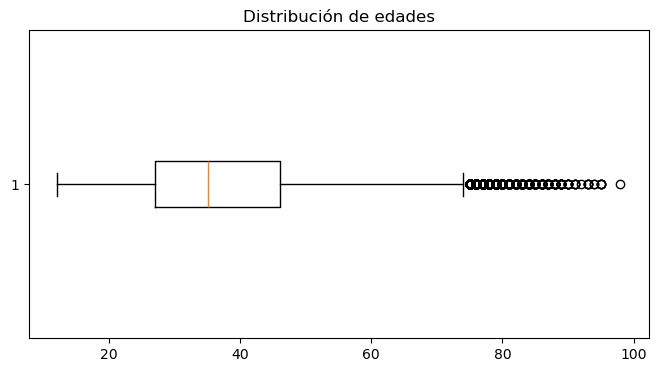

Primer cuartil (Q1): 27.0
Mediana (Q2): 35.0
Tercer cuartil (Q3): 46.0

Promedio de edades presentes en los accidentes: 37.23


In [17]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['EDAD'], vert=False)
plt.title("Distribución de edades")

plt.show()

Q1 = df['EDAD'].quantile(0.25)
Q2 = df['EDAD'].median()
Q3 = df['EDAD'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Mediana (Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")

print(f"\nPromedio de edades presentes en los accidentes: {df['EDAD'].mean():.2f}")

In [18]:
# bins = [12, 22, 26, 30, 35, 39, 45, 53, 73, 98]
# labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# df['EDADCATEGORIA'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convertir a tipo objeto para poder asignar valores fuera de la categoría
# df['EDADCATEGORIA'] = df['EDADCATEGORIA'].astype(object)

# Categoría 0 = "Se fugó"
# df.loc[df['EDAD'] == 0, 'EDADCATEGORIA'] = 0

# df['EDADCATEGORIA'] = df['EDADCATEGORIA'].astype(int)

In [19]:
df.shape

(180219, 38)

In [20]:
df.to_csv('../data/processed/processed_nacional.csv', index=False)